In [11]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
from sklearn.datasets import fetch_california_housing
warnings.filterwarnings('ignore')

# Data Preparation

In [3]:
# Load the California housing dataset
data = fetch_california_housing()

# Create a DataFrame for features and target
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [4]:
X.head() # predictor

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
y[1:10] # response

1    3.585
2    3.521
3    3.413
4    3.422
5    2.697
6    2.992
7    2.414
8    2.267
9    2.611
dtype: float64

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model training and evalation

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

# Creating GradientBoosting Regressor
gradientregressor = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate=1.0)


In [16]:
# creating Gradientboost REGRESSOR
model = gradientregressor.fit(X_train, y_train)

# predict the response for the test dataset
y_pred = model.predict(X_test)

In [17]:
r2_score(y_pred, y_test)

0.7525246227333553

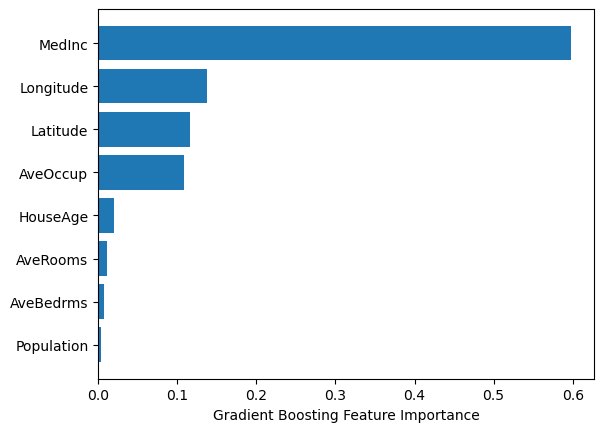

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot feature importance
feature_importance = gradientregressor.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Gradient Boosting Feature Importance")
plt.show()


# Hyperparameter Tuning

In [21]:
# Define the hyperparameter grid
LR = {'learning_rate': [0.15, 0.1, 0.05],  # Corrected duplicates
    'n_estimators': [100, 150, 200, 250]}

# Create a GradientBoostingRegressor instance
gbr = GradientBoostingRegressor()

# Create the GridSearchCV object
tuning = GridSearchCV(estimator=gbr,
                      param_grid=LR, scoring='r2') 
# Fit the model
tuning.fit(X_train, y_train)
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.15, 'n_estimators': 250}, 0.8204005555323338)

# similalry other hyperameter like max_depth, split criteria, min no leaf nodes etc can be tuned